# Introduction to Commercial Optimization Solvers
## Mehmet Gönen
## October 26, 2022

In [1]:
# load libraries
import numpy as np
import scipy.sparse as sp

import cplex as cp

### Method 3

In [2]:
def linear_programming(direction, A, senses, b, c, l, u):
    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their coefficients in objective and ranges
    prob.variables.add(obj = c.tolist(), lb = l.tolist(), ub = u.tolist())

    # define problem type
    if direction == "maximize":
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        prob.objective.set_sense(prob.objective.sense.minimize)

    # add constraints to the problem including their directions and right-hand side values
    prob.linear_constraints.add(senses = senses.tolist(), rhs = b.tolist())

    # add coefficients for each constraint
    row_indices, col_indices = A.nonzero()
    prob.linear_constraints.set_coefficients(zip(row_indices.tolist(),
                                                 col_indices.tolist(),
                                                 A.data.tolist()))

    # solve the problem
    prob.solve()

    # check the solution status
    print(prob.solution.get_status())
    print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star = prob.solution.get_values()
    obj_star = prob.solution.get_objective_value()

    return(x_star, obj_star)

In [3]:
c = np.array([3, 5])
A = sp.csr_matrix(np.array([[1, 0],
                            [0, 2],
                            [3, 2]]))
senses = np.array(["L", "L", "L"])
b = np.array([4, 12, 18])
l = np.array([0, 0])
u = np.array([cp.infinity, cp.infinity])

variable_names = ["x{}".format(i + 1) for i in range(c.size)]
constraint_names = ["c{}".format(i + 1) for i in range(b.size)]

In [4]:
x_star, obj_star = linear_programming("maximize", A, senses, b, c, l, u)
print(x_star)
print(obj_star)

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 2 rows and 0 columns.
Reduced LP has 1 rows, 2 columns, and 2 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            36.000000
1
optimal
[2.0, 6.0]
36.0


## Transportation problem

The transportation problem is a network-flow model without intermediate locations. To formulate the problem, let us define the following terms:

\begin{align*}
a_{i} &= \textrm{Number of units available at source $i$ ($i = 1,2,\dots,m$);}\\
b_{j} &= \textrm{Number of units required at destination $j$ ($j = 1,2,\dots,n$);}\\
c_{ij} &= \textrm{Unit transportation cost from source $i$ to destination $j$ ($i = 1,2,\dots,m$; $j = 1,2,\dots,n$).}
\end{align*}

For the moment, we assume that the total product availability is equal to the total product requirements; that is,
\begin{align*}
\sum\limits_{i=1}^{m} a_{i} = \sum\limits_{j=1}^{n} b_{j}.
\end{align*}

If we define the decision variables as:

\begin{align*}
x_{ij} &= \textrm{Number of units to be distributed from source $i$ to destination $j$ ($i = 1,2,\dots,m$; $j = 1,2,\dots,n$),}
\end{align*}

we may then formulate the transportation problem as follows:

\begin{align*}
\mbox{minimize} \;\;& \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{n} c_{ij} x_{ij} \\
\mbox{subject to:} \;\;& \sum\limits_{j=1}^{n} x_{ij} = a_{i} \;\;\;\; \textrm{$i = 1,2,\dots,m$,}\\
\;\;& \sum\limits_{i=1}^{m} x_{ij} = b_{j} \;\;\;\; \textrm{$j = 1,2,\dots,n$,}\\
\;\;& x_{ij} \geq 0 \;\;\;\; \textrm{$i = 1,2,\dots,m$; $j = 1,2,\dots,n$.}
\end{align*}




Let us consider a simple example. A compressor company has plants in three locations: Cleveland, Chicago, and Boston. During the past week the total production of a special compressor unit out of each plant has been 35, 50, and 40 units respectively. The company wants to ship 45 units to a distribution center in Dallas, 20 to Atlanta, 30 to San Francisco, and 30 to Philadelphia. The unit production and distribution costs from each plant to each distribution center are given in the following table. What is the best shipping strategy to follow?

|                  | Dallas | Atlanta | San Francisco | Philadelphia | **Availability** |
| ---------------- | :----: | :-----: | :-----------: | :----------: | :--------------: |
| **Cleveland**    | 8      | 6       | 10            | 9            | **35**           |
| **Chicago**      | 9      | 12      | 13            | 7            | **50**           |
| **Boston**       | 14     | 9       | 16            | 5            | **40**           |
| **Requirements** | **45** | **20**  | **30**        | **30**       | **125**          |

The linear-programming formulation of the corresponding transportation problem is:
\begin{align*}
\mbox{minimize} \;\;& 8x_{11} + 6x_{12} + 10x_{13} + 9x_{14}
                    + 9x_{21} + 12x_{22} + 13x_{23} + 7x_{24}
                    + 14x_{31} + 9x_{32} + 16x_{33} + 5x_{34}\\
\mbox{subject to:} \;\;& +1x_{11} +1x_{12} +1x_{13} +1x_{14} \phantom{\:\:+0x_{21} +0x_{22} +0x_{23} +0x_{24} +0x_{31} +0x_{32} +0x_{33} +0x_{34}} = 35 \\
                   \;\;& \phantom{+0x_{11} +0x_{12} +0x_{13} +0x_{14}\:\:} +1x_{21} +1x_{22} +1x_{23} +1x_{24} \phantom{+0x_{31} +0x_{32} +0x_{33} +0x_{34}\:\:} = 50 \\
                   \;\;& \phantom{+0x_{11} +0x_{12} +0x_{13} +0x_{14} +0x_{21} +0x_{22} +0x_{23} +0x_{24}\:\:} +1x_{31} +1x_{32} +1x_{33} +1x_{34} = 40 \\
                    \;\;& +1x_{11} \phantom{+0x_{12} +0x_{13} +0x_{14}\:\:} +1x_{21} \hphantom{+0x_{22} +0x_{23} +0x_{24}\:\:} +1x_{31} \phantom{+0x_{32} +0x_{33} +0x_{34}\:\:} = 45 \\
                    \;\;& \phantom{+0x_{11}\:\:} +1x_{12} \phantom{+0x_{13} +0x_{14} +0x_{21}\:\:} +1x_{22} \phantom{+0x_{23} +0x_{24} +0x_{31}\:\:} +1x_{32} \phantom{+0x_{33} +0x_{34}\:\:} = 20 \\
                    \;\;& \phantom{+0x_{11} +0x_{12}\:\:} +1x_{13} \phantom{+0x_{14} +0x_{21} +0x_{22}\:\:} +1x_{23} \phantom{+0x_{24} +0x_{31} +0x_{32}\:\:} +1x_{33} \phantom{+0x_{34}\:\:} = 30 \\
                    \;\;& \phantom{+0x_{11} +0x_{12} +0x_{13}\:\:} +1x_{14} \phantom{+0x_{21} +0x_{22} +0x_{23}\:\:} +1x_{24} \phantom{+0x_{31} +0x_{32} +0x_{33}\:\:} +1x_{34} = 30 \\
\;\;& x_{11} \geq 0 \\
\;\;& x_{12} \geq 0 \\
\;\;& x_{13} \geq 0 \\
\;\;& x_{14} \geq 0 \\
\;\;& x_{21} \geq 0 \\
\;\;& x_{22} \geq 0 \\
\;\;& x_{23} \geq 0 \\
\;\;& x_{24} \geq 0 \\
\;\;& x_{31} \geq 0 \\
\;\;& x_{32} \geq 0 \\
\;\;& x_{33} \geq 0 \\
\;\;& x_{34} \geq 0
\end{align*}

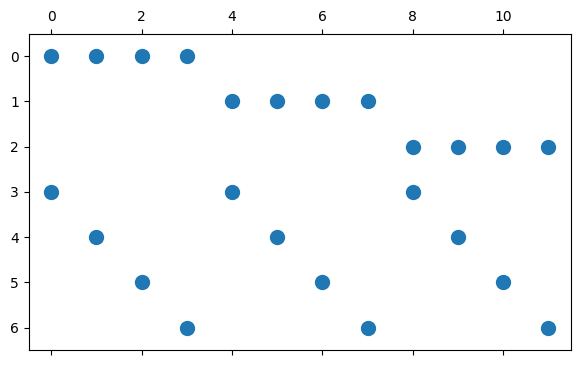

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
No LP presolve or aggregator reductions.
Presolve time = 0.00 sec. (0.01 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =           980.000000
1
optimal
[[ 0. 10. 25.  0.]
 [45.  0.  5.  0.]
 [ 0. 10.  0. 30.]]
1020.0


In [5]:
c = np.array([8, 6, 10, 9, 9, 12, 13, 7, 14, 9, 16, 5])

aij = np.repeat(1, 24)
row = np.concatenate((np.repeat([0, 1, 2], 4), np.repeat([3, 4, 5, 6], 3)))
col = np.concatenate((range(12), np.hstack([[i, i + 4, i + 8] for i in range(4)])))
A = sp.csr_matrix((aij, (row, col)), shape = (7, 12))

import matplotlib.pyplot as plt
plt.figure(figsize = (7, 12))
plt.spy(A, marker = "o")
plt.show()

senses = np.array(["E", "E", "E", "E", "E", "E", "E"])
b = np.array([35, 50, 40, 45, 20, 30, 30])
l = np.repeat(0, 12)
u = np.repeat(cp.infinity, 12)

x_star, obj_star = linear_programming("minimize", A, senses, b, c, l, u)
print(np.array(x_star).reshape(3, 4))
print(obj_star)

## Solving a QP problem
\begin{align*}
\mbox{maximize} \;\;& 0.20x_{1} + 0.16x_{2} - \theta\left[2x_{1}^{2} + x_{2}^{2} + (x_{1} + x_{2})^{2}\right] \\
\mbox{subject to:} \;\;& 1x_{1} + 1x_{2} \leq 5000 \\
\;\;& x_{1} \geq 0 \\
\;\;& x_{2} \geq 0
\end{align*}

In [6]:
theta = 0.00001
# create an empty optimization problem
prob1 = cp.Cplex()
prob1.set_problem_name("prob1")

# add decision variables to the problem including their linear coefficients in objective, ranges, and names
prob1.variables.add(obj = [0.20, 0.16], lb = [0, 0], ub = [cp.infinity, cp.infinity],
                    names = ["x1", "x2"])

prob1.objective.set_quadratic_coefficients(0, 0, -3 * theta * 2)
prob1.objective.set_quadratic_coefficients(0, 1, -1 * theta * 2)
prob1.objective.set_quadratic_coefficients(1, 0, -1 * theta * 2)
prob1.objective.set_quadratic_coefficients(1, 1, -2 * theta * 2)

# define problem type
prob1.objective.set_name("profit")
prob1.objective.set_sense(prob1.objective.sense.maximize)

# add constraints to the problem including their directions, right-hand side values, and names
prob1.linear_constraints.add(senses = ["L"], rhs = [5000], names = ["c1"])

# add coefficients for each constraint
prob1.linear_constraints.set_coefficients(0, 0, 1)
prob1.linear_constraints.set_coefficients(0, 1, 1)

# display the problem
print(prob1.write_as_string())

# solve the problem
prob1.solve()

# check the solution status
print(prob1.solution.get_status())
print(prob1.solution.status[prob1.solution.get_status()])

# check the solution
x_star = prob1.solution.get_values()
obj_star = prob1.solution.get_objective_value()
print(x_star)
print(obj_star)

\ENCODING=ISO-8859-1
\Problem name: prob1

Maximize
 profit: 0.2 x1 + 0.16 x2 + [ - 0.00006 x1 ^2 - 0.00004 x1 * x2 - 0.00004 x2 ^2
         ] / 2
Subject To
 c1: x1 + x2 <= 5000
End

Version identifier: 20.1.0.1 | 2022-01-05 | 9df5e5246
CPXPARAM_Read_DataCheck                          1
Number of nonzeros in lower triangle of Q = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops to factor    = 5
Tried aggregator 1 time.
QP Presolve added 0 rows and 2 columns.
Reduced QP has 3 rows, 4 columns, and 7 nonzeros.
Reduced QP objective Q matrix has 2 nonzeros.
Presolve time = 0.01 sec. (0.00 ticks)
Parallel mode: using up to 8 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 3
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
